# This is a program that will return daily historical share price data and generate a number of useful charts and plots.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [47]:
# Specify date range
start = datetime.datetime(2000,1,1)
end = datetime.date.today()

In [48]:
# Ask user for stock code
stock = input('Enter ASX Stock Code: ')
stock = stock.upper()
stock = str(stock) + '.AX'

Enter ASX Stock Code: cba


In [49]:
# create empty pandas data frame
df = pd.DataFrame()

In [50]:
# Download historic data for selected stock
df = yf.download(stock, start=start, end=end, progress=False)
# df = df['Close']

In [51]:
# Claculate moving average and add this to data frame 
df['50 Day MA'] = df.iloc[:,4].rolling(window=50).mean()
df['21 Day MA'] = df.iloc[:,4].rolling(window=21).mean()

In [52]:
# df.tail()

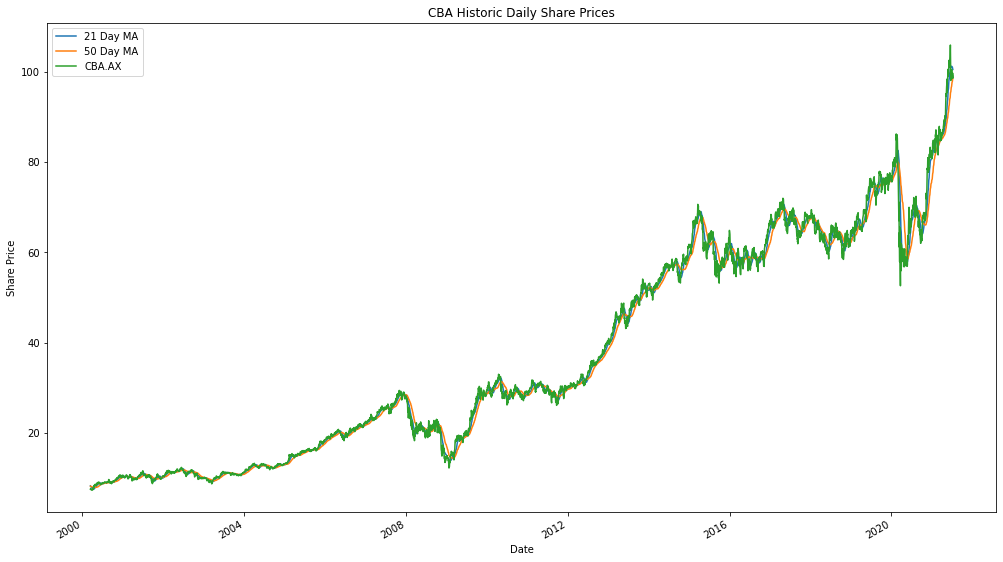

In [65]:
df['21 Day MA'].plot(label='21 Day MA', figsize=(17,10)).set_ylabel('Share Price')
df['50 Day MA'].plot(label='50 Day MA')
df['Adj Close'].plot(label=str(stock))
plt.legend()
plt.title(str(stock[0:3]) + ' Historic Daily Share Prices')
plt.show()

In [54]:
# Calculate 1 day log return

df['Change'] = np.log(df['Close'] / df['Close'].shift(1))
# df.tail()

Text(0.5, 1.0, 'CBA 1 Day Log Return')

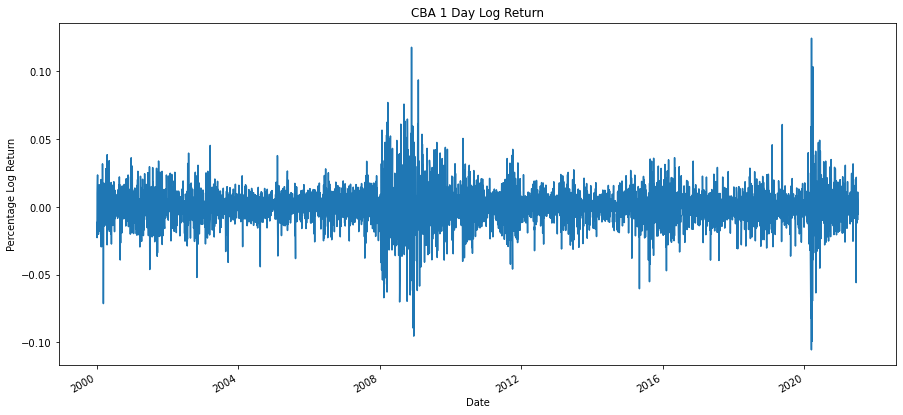

In [55]:
df['Change'].plot(figsize=(15,7)).set_ylabel('Percentage Log Return')
plt.title(str(stock[0:3]) + ' 1 Day Log Return')

In [56]:
# Calculate the rolling volatility, (21 days is standard).

df['21 Day Vol'] = df.Change.rolling(21).std()
# df.tail()

Text(0.5, 1.0, 'CBA 21 Day Volatility')

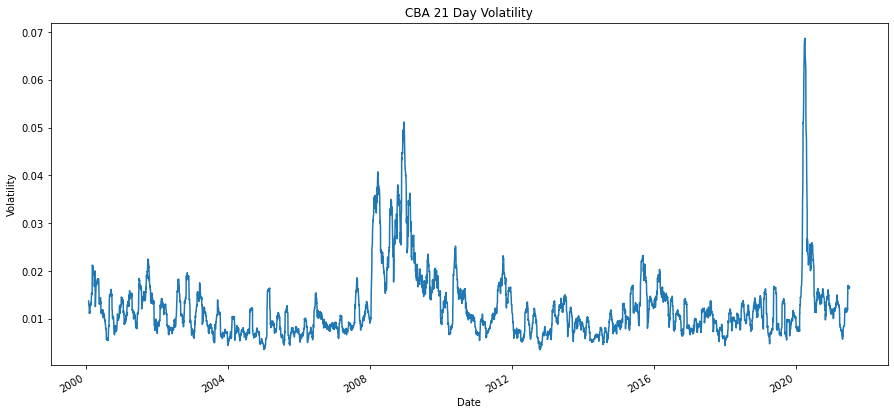

In [57]:
df['21 Day Vol'].plot(figsize=(15,7)).set_ylabel('Volatility')
plt.title(str(stock[0:3]) + ' 21 Day Volatility')

In [58]:
# 1. Calculate the Dollar Value change in the price
# 2. Calculate the expected 1 day change in the stock price using volatility as the explanatory variable

df['$ Change'] = df['Close'] - df['Close'].shift(1)
df['Expected Change'] = df['Close'] * df['21 Day Vol']
# df

In [59]:
# Calculate the magnitude of the actual $ change over the expected change to visualise the difference between expected change and actual $ change

df['Magnitude'] = df['$ Change'] / df['Expected Change']
# df

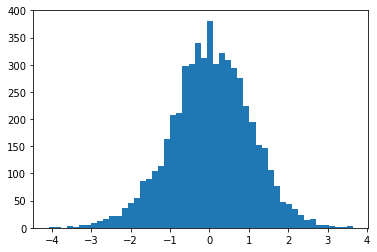

In [60]:
plt.hist(df['Magnitude'], bins=(50))
plt.show()

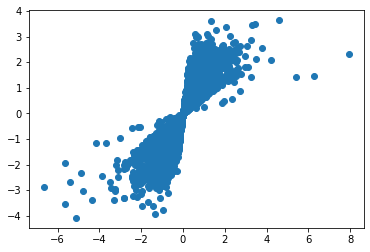

In [61]:
plt.scatter(df['$ Change'], df['Magnitude'])

In [62]:
df['Abs Mag'] = np.abs(df['Magnitude'])
# df

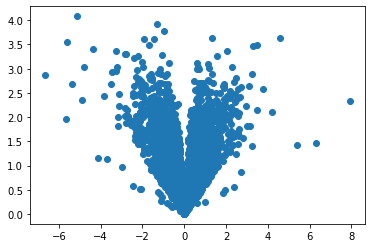

In [63]:
# Scatter plot of the actual change with the absolute value of the magnitude 

plt.scatter(df['$ Change'], df['Abs Mag'])

In [64]:
# Slice data frame to not include blank data

df = df.iloc[49:]
df

,Open,High,Low,Close,Adj Close,Volume,50 Day MA,21 Day MA,Change,21 Day Vol,$ Change,Expected Change,Magnitude,Abs Mag
Date,,,,,,,,,,,,,,
2000-03-13,22.975517,23.273901,22.846218,22.995411,7.475688,2673211,8.157112,8.230850,0.005204,0.020955,0.119354,0.481877,0.247686,0.247686
2000-03-14,22.975517,23.363417,22.925789,22.975517,7.469221,1774576,8.140531,8.187213,-0.000865,0.020515,-0.019894,0.471345,-0.042206,0.042206
2000-03-15,22.975517,23.423094,22.895948,23.383308,7.601793,1927674,8.128499,8.148382,0.017593,0.021077,0.407791,0.492848,0.827417,0.827417
2000-03-16,23.761261,23.771208,23.174440,23.177423,7.534859,1617765,8.118799,8.098169,-0.008844,0.020212,-0.205885,0.468458,-0.439495,0.439495
2000-03-17,23.563334,23.563334,22.876057,22.876057,7.436885,2470537,8.110302,8.047358,-0.013088,0.020244,-0.301367,0.463100,-0.650760,0.650760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05,99.029999,99.459999,98.720001,99.180000,99.180000,1210399,97.836801,101.003810,-0.003121,0.016637,-0.309998,1.650048,-0.187872,0.187872
2021-07-06,99.500000,99.959999,98.620003,98.620003,98.620003,2030654,98.028201,100.818096,-0.005662,0.016356,-0.559998,1.613021,-0.347173,0.347173
2021-07-07,98.500000,99.709999,98.349998,99.709999,99.709999,1879216,98.235800,100.712382,0.010992,0.016563,1.089996,1.651454,0.660022,0.660022
